In [1]:
from google.colab import files

Imports

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import statsmodels.formula.api as sm

In [6]:
Housing = files.upload()

Saving Housing.xlsx to Housing.xlsx


In [7]:
Housing = pd.read_excel('Housing.xlsx')

In [8]:
type(Housing)

pandas.core.frame.DataFrame

:The .head() command allows you to view the 1st 15 rows of your file

**Gives number of rows, number of columns**

In [9]:
Housing.shape

(545, 13)

**Displays the column names**

In [10]:
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
Housing.sort_values("price", ascending = False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished




```
# This is formatted as code
```

**Drop the top 6 values and the bottom 6 values by price to remove the 1% outliers from both ends**

In [13]:
Housing.drop([539,540,541,542,543,544], inplace=True)
Housing.drop([0,1,2,3,4,5], axis=0, inplace=True)
Housing.sort_values("price", ascending = False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [14]:
Housing.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished


In [15]:
Price = Housing['price']
Price.describe()

,price
count,5.330000e+02
mean,4.718387e+06
std,1.694235e+06
min,1.890000e+06
25%,3.465000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.015000e+07


In [16]:
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000
mean,4.718387e+06,5139.803002,2.962477,1.277674,1.806754,0.677298
std,1.694235e+06,2157.787609,0.737362,0.484544,0.866129,0.847925
min,1.890000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.465000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.015000e+07,16200.000000,6.000000,3.000000,4.000000,3.000000


In [17]:
Price.replace([0, 99999999999999], np.nan, inplace = True)

In [18]:
Price.max()

10150000

The .describe() command gives the summary statistics

Histogram of the house prices. Dropped the zeroes and highest (which seems not valid). These were replaced NaNs earlier and are now dropped.

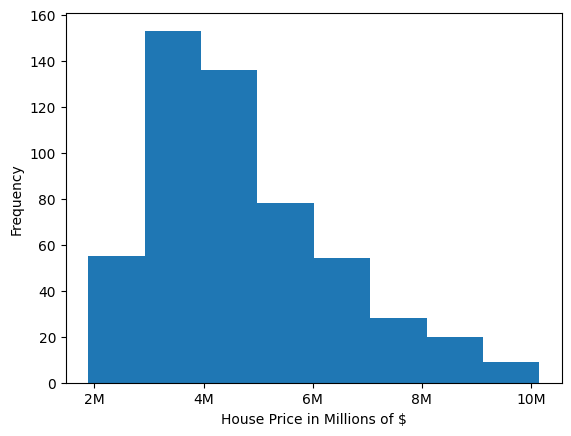

In [19]:
plt.hist(Price, bins=8)
import matplotlib.ticker as ticker

def millions_formatter(x, pos):
    return f"{int(x / 1e6)}M"

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.xlabel('House Price in Millions of $')
plt.ylabel('Frequency')
plt.show()

Bar Plot

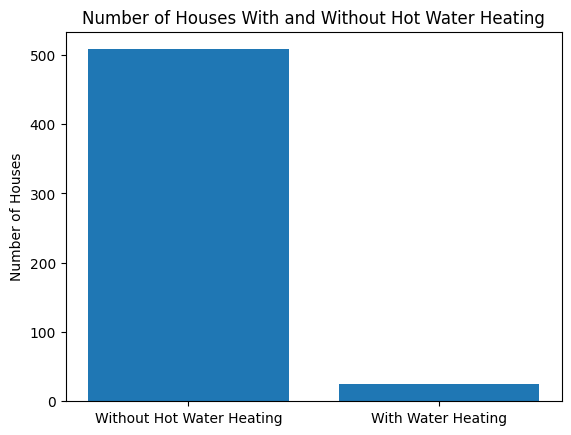

In [20]:
# Count the number of houses with and without hotwaterheating
hotwaterheating_counts = Housing['hotwaterheating'].value_counts()
# Create a bar plot
plt.bar(hotwaterheating_counts.index, hotwaterheating_counts.values)
# Set labels and title
plt.xticks([0, 1], ['Without Hot Water Heating', 'With Water Heating'])
plt.ylabel('Number of Houses')
plt.title('Number of Houses With and Without Hot Water Heating')
# Show the plot
plt.show()

**Pie Chart**

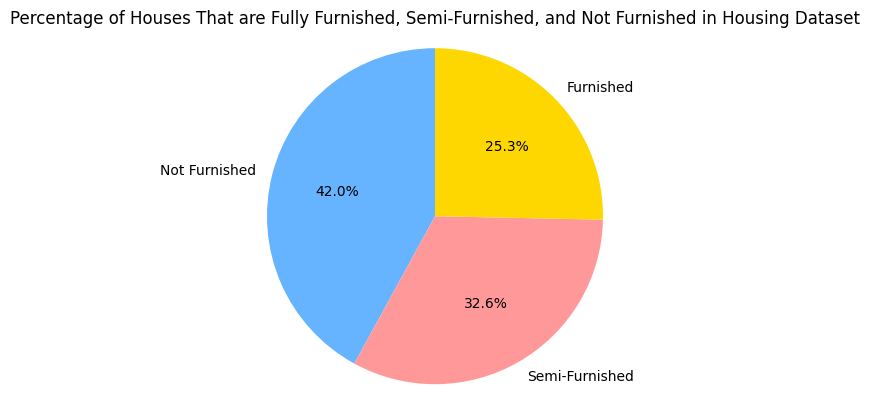

In [21]:
# Count the number of houses with and without a waterfront
furnishingstatus_counts = Housing['furnishingstatus'].value_counts()
# Create a pie chart
labels = ['Not Furnished', 'Semi-Furnished','Furnished']
colors = ['#66b3ff', '#ff9999', '#ffd700']
plt.pie(furnishingstatus_counts, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)
# Set title
plt.title('Percentage of Houses That are Fully Furnished, Semi-Furnished, and Not Furnished in Housing Dataset')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Show the plot
plt.show()

**Scatterplot**

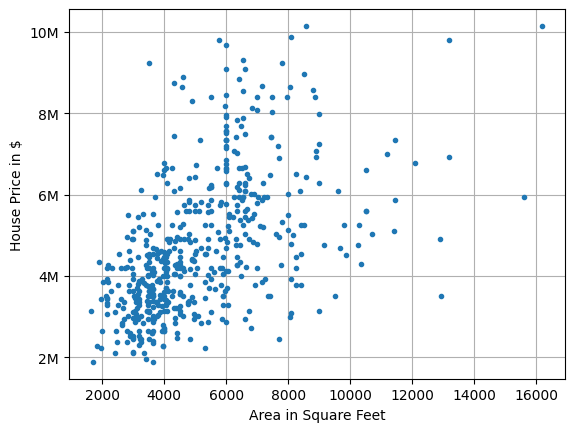

In [22]:
plt.plot(Housing.area, Housing.price,'o', markersize=3)
#gets current axes of all plots
ax = plt.gca()
#format
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax.grid()
plt.xlabel('Area in Square Feet')
plt.ylabel('House Price in $')
plt.show()

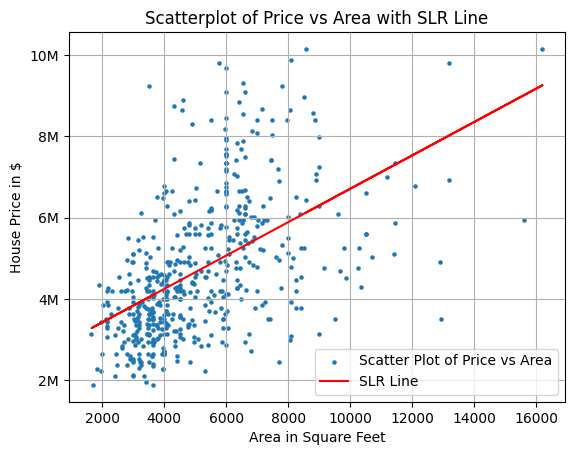

In [23]:
from re import X
plt.grid()
plt.scatter(Housing.area, Housing.price, label='Scatter Plot of Price vs Area', s=5)
line_intercept=2609000
line_coefficient=410.3246
line=line_intercept + line_coefficient*Housing.area

plt.plot(Housing.area, line, color='red', label='SLR Line')
plt.xlabel('Area in Square Feet')

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.ylabel('House Price in $')
plt.title('Scatterplot of Price vs Area with SLR Line')

plt.legend()

plt.show()

**Simple Linear Regression for Housing price-Housing area**

In [24]:
SLR=sm.ols(formula = 'Housing.area ~ Housing.price', data = Housing).fit()
SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Housing.area   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     199.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.10e-38
Time:                        03:01:21   Log-Likelihood:                -4762.5
No. Observations:                 533   AIC:                             9529.
Df Residuals:                     531   BIC:                             9538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1999.3588    236.214      8.464      0.000    1535.331    2463.387
Housing.price     0.0007   4.71e-05     14.125      0.000       0.001       0.001
==============================================================================
Omnibus:                      166.858   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.948
Skew:                           1.501   Prob(JB):                    2.02e-108
Kurtosis:                       6.649   Cond. No.                     1.48e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R squared value for Simple Linear Regression**

In [25]:
SLR.rsquared

np.float64(0.2731021125311274)

**Anova Table for Simple Linear Regression**

In [26]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
SLR = smf.ols('Housing.price ~ Housing.area', data = Housing).fit()
anova_table = anova_lm(SLR)
print(anova_table)

                 df        sum_sq       mean_sq           F        PR(>F)
Housing.area    1.0  4.170461e+14  4.170461e+14  199.501504  1.096662e-38
Residual      531.0  1.110024e+15  2.090441e+12         NaN           NaN


**MultiLinear Regression Model of Price vs Area and Parking**

In [27]:
MLR=sm.ols(formula = 'Housing.price ~ Housing.area + Housing.parking', data = Housing).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Housing.price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.93e-42
Time:                        03:01:21   Log-Likelihood:                -8303.9
No. Observations:                 533   AIC:                         1.661e+04
Df Residuals:                     530   BIC:                         1.663e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         2.61e+06   1.59e+05     16.460      0.000     2.3e+06    2.92e+06
Housing.area      360.9828     30.214     11.948      0.000     301.629     420.337
Housing.parking  3.732e+05   7.69e+04      4.854      0.000    2.22e+05    5.24e+05
==============================================================================
Omnibus:                       32.412   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.908
Skew:                           0.600   Prob(JB):                     9.67e-09
Kurtosis:                       3.470   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are codes for individual statistics as well. For example, the following is for rsquared

**`ANOVA Table for MultiLinear Regression Model`**

In [28]:
anova_table3 = anova_lm(MLR)
print(anova_table3)

                    df        sum_sq       mean_sq           F        PR(>F)
Housing.area       1.0  4.170461e+14  4.170461e+14  207.976884  5.179996e-40
Housing.parking    1.0  4.724046e+13  4.724046e+13   23.558362  1.596474e-06
Residual         530.0  1.062784e+15  2.005252e+12         NaN           NaN


**R squared for MLR**

In [29]:
MLR.rsquared

np.float64(0.304037465463056)

**Filtering Data, Specifically Houses with less than 2 bedrooms**

In [30]:
singlebed = Housing['bedrooms']<2

In [31]:
singlebed.head(100)

,bedrooms
6,False
7,False
8,False
9,False
10,False
...,...
101,False
102,False
103,False
104,False


In [32]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished


**Filtering Data, Specifically Houses with less than 3 bedrooms**

In [33]:
singlebed.sum()

np.int64(2)

In [34]:
from statsmodels.stats.anova import anova_lm

In [35]:
anova_lm(MLR)

,df,sum_sq,mean_sq,F,PR(>F)
Housing.area,1.0,4.170461e+14,4.170461e+14,207.976884,5.179996e-40
Housing.parking,1.0,4.724046e+13,4.724046e+13,23.558362,1.596474e-06
Residual,530.0,1.062784e+15,2.005252e+12,NaN,NaN


Exporting Data to Excel File

In [36]:
# The following code read the first five columns of the LifeExpectanceData dataframe and save it as a new file called 'NY Housing Data_subset.xlsx':
# Select the first 5 columns
LifeExpectanceData_subset = Housing.iloc[:, :5]

# Save the subset to a new Excel file
LifeExpectanceData_subset.to_excel('/content/HousingSubdata.xlsx', index=False)